In [43]:
import re 
import statistics as st
from unicodedata import normalize 
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import normaltest
from scipy import stats 

In [2]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
            'n','ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

vowels = ['a','e','i','o','u']

consonants = ['b','c','d','f','g','h','j','k','l','m','n',
              'ñ','p','q','r','s','t','v','w','x','y','z']

In [150]:
with open("Data_Base_Words_Filter.txt", 'r') as raw_file:

  logs_text = raw_file.read()

#print(logs_text)
words_filter_list = re.sub("[\s]", " ",logs_text).split()
print(len(words_filter_list))

with open("Data_Base_Final_Words.txt", 'r') as raw_file:

  logs_text = raw_file.read()

#print(logs_text)
words_final_list = re.sub("[\s]", " ",logs_text).split()
print(len(words_final_list))

214598
32430


In [6]:
def calculate_stadistics(numbers_list):
    quartil_1 = np.percentile(numbers_list, 25)
    quartil_2 = np.percentile(numbers_list, 50)
    quartil_3 = np.percentile(numbers_list, 75)
    p99 = np.percentile(numbers_list, 99)-1
    median = np.median(numbers_list)
    mode = st.mode(numbers_list)
    mean = np.mean(numbers_list)
    variance = np.var(numbers_list)
    deviation = np.std(numbers_list)
    return[quartil_1,quartil_2,quartil_2,p99,median,mode,mean,variance,deviation]

In [7]:
def len_words(words_list,long = None):
    letters_in_a_word = []
    for word in words_list:
        cont = 0
        for letter in word:
            cont += 1
        letters_in_a_word.append(cont)
    words_long = [0 for i in range(max(letters_in_a_word)+1)]
    for num in letters_in_a_word:
        words_long[num] += 1
    words = []
    if long != None:
        for num in range(len(letters_in_a_word)):
            if letters_in_a_word[num] == long:
                words.append(words_list[num])
    else:
        words = ['0']
    return [words_long,words,letters_in_a_word]
#words_filter_long=len_words(words_filter_list,20)
#print(words_filter_long[1])
#def len_words_list(words_list,long)

In [166]:
def bars_diagram(x_list,y_list,title = 'Diagrama de Barras',labelx='',labely='',stadistics=None,move=0,sizex=10,sizey=6):
    # create a dataset
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i,y[i],y[i])
            
    plt.figure(figsize = (sizex,sizey))
    height = y_list
    bars = x_list
    x_pos = np.arange(len(bars))
    
    # Create bars
    plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6), data= x_list )
    #graphic
    if stadistics != None:
        if len(stadistics)== 9:
            plt.axvline(stadistics[0]-move,color = 'b',label = 'Q1')
            plt.axvline(stadistics[1]-move,color = 'g',label = 'Q2')
            plt.axvline(stadistics[2]-move,color = 'y',label = 'Q3')
            plt.axvline(stadistics[3]-move,color = 'r',label = 'P99')
            plt.legend()
            


             # Create names on the x-axis
            plt.xticks(x_pos, bars)
            # Show graph
            plt.title(title,size = 18)
            plt.xlabel(labelx,size= 15)
            plt.ylabel(labely,size = 15)
            addlabels(x_list, y_list)
            print('La mediana es: {}'.format(stadistics[4]))
            print('La moda es: {}'.format(stadistics[5]))
            print('La media es: {}'.format(stadistics[6]))
            print('La varianza es: {}'.format(stadistics[7]))
            print('La desviacion estandar es: {}'.format(stadistics[8]))
            return plt.show()
        
        else:
            'Parametros de estadistica malos'
    # Create names on the x-axis
    plt.xticks(x_pos, bars)
    # Show graph
    plt.title(title,size = 18)
    plt.xlabel(labelx,size=14)
    plt.ylabel(labely,size=14)
    addlabels(x_list, y_list)
    return plt.show()

In [12]:


def posittion_dict(letters_list,words_list):
    dicts = {}
    for letter in letters_list:
        for word in words_list:
            for letter1 in range(len(word)):
                if letter == word[letter1]:
                    if letter not in dicts:
                        dicts[letter] = []
                    dicts[letter].append(letter1+1)
                    
    return dicts


In [4]:
# Cuenta el nuemro de veces que se repiten las palabras
frequency_words = []
for word in words_final_list:
    count = words_filter_list.count(word)
    frequency_words.append(count)

In [93]:

order_words_list = frequency_words[:]
order_words_list.sort(reverse=True)



[]


In [167]:

def bars_graphs_descending(x_axis,y_axis,title = 'Diagrama de Barras Descendente',
                           labelx='Eje x',labely='Eje y',sizex=10,sizey=6):
    
    
    df_words_frecuency= pd.DataFrame(list(zip(x_axis,y_axis)),
                     columns =['x_axis', 'y_axis'])

    #df_words_frecuency.sort_values(by=['frecuency'] ,ascending=False)
    plt.figure(figsize=(sizex,sizey))
    # make barplot and sort bars in descending order
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i,y[i],y[i])
    splot = sns.barplot(x= 'x_axis', 
                y= 'y_axis', 
                data= df_words_frecuency, 
                order=df_words_frecuency.sort_values('y_axis',ascending = False).x_axis,
                color=(0.2, 0.4, 0.6, 0.6))
    # set labels
    plt.xlabel(labelx, size=15)
    plt.ylabel(labely, size=15)
    plt.title(title, size=18)
    

    plt.bar_label(splot.containers[0])
    plt.show()
    #plt.tight_layout()
    #plt.savefig("sort_bars_in_barplot_descending_order_Seaborn_Python.png", dpi=100)

    #ax = df_words_frecuency.plot.bar(x='words', y='frecuency', rot=0)


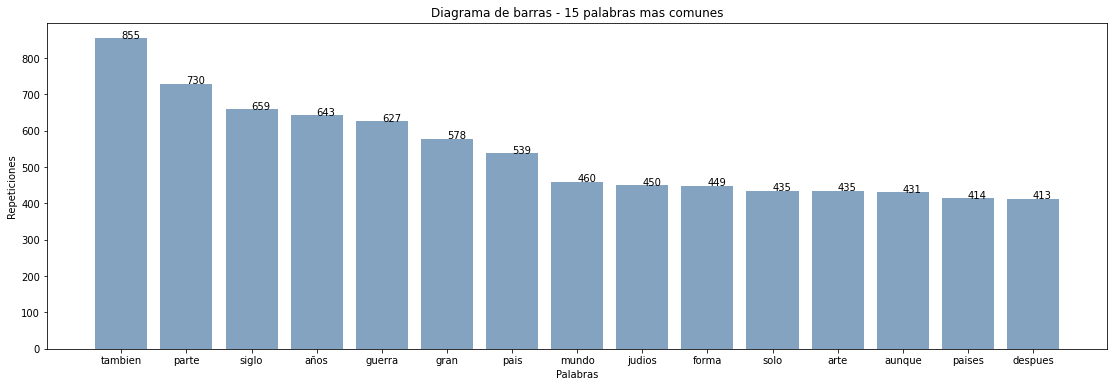

In [128]:
frequency_word_list_ordered = []
most_repeated_words = []
repeat_frequency = []
k = 0 #Variable para contar las palabras repetidas que se han puesto en el arreglo
for i in range(15):
    frequency_word_list_ordered.append(order_words_list[i])
    if order_words_list[i] == order_words_list[i-1]:
        for j in range(len(frequency_words)):
            if frequency_words[j] == order_words_list[i]:
                repeat_frequency.append(words_final_list[j])
        #print(repeat_frequency)
        k += 1
        most_repeated_words.append(repeat_frequency[k])
    else:
        most_repeated_words.append(words_final_list[frequency_words.index(order_words_list[i])])
        k=0
        repeat_frequency = []
#print(most_repeated_words)
#print(frequency_word_list_ordered)
bars_diagram(most_repeated_words,frequency_word_list_ordered,'Diagrama de barras - 15 palabras mas comunes',
             'Palabras','Repeticiones',None,None,19,6)

La mediana es: 7.0
La moda es: 7
La media es: 7.617537339564764
La varianza es: 5.9810199980629974
La desviacion estandar es: 2.4456123973481567


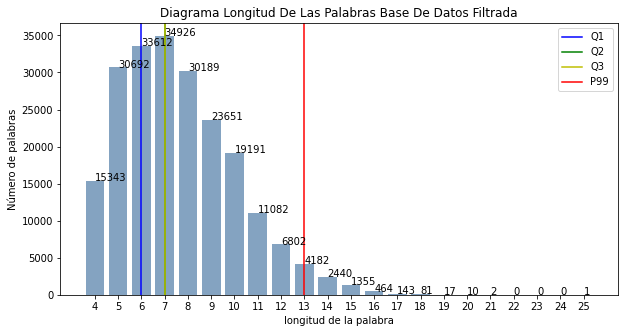

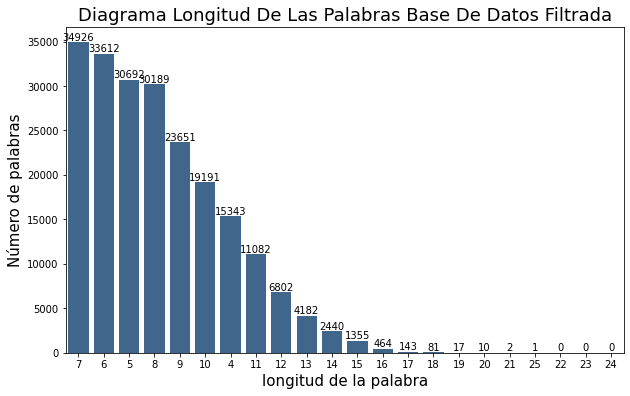

In [126]:
words_filter_long=len_words(words_filter_list,21)
xaxis= [str(i) for i in range(26)]
stadistics = calculate_stadistics(words_filter_long[2])
bars_diagram(words_filter_long[0][4:],xaxis[4:],'Diagrama Longitud De Las Palabras Base De Datos Filtrada',
             'longitud de la palabra','Número de palabras',stadistics,4)
bars_graphs_descending(xaxis[4:],words_filter_long[0][4:],'Diagrama Longitud De Las Palabras Base De Datos Filtrada',
             'longitud de la palabra','Número de palabras')


['nicenoconstantinopolitano']
La mediana es: 8.0
La moda es: 8
La media es: 8.502528522972556
La varianza es: 6.781908500188598
La desviacion estandar es: 2.6042097650129103


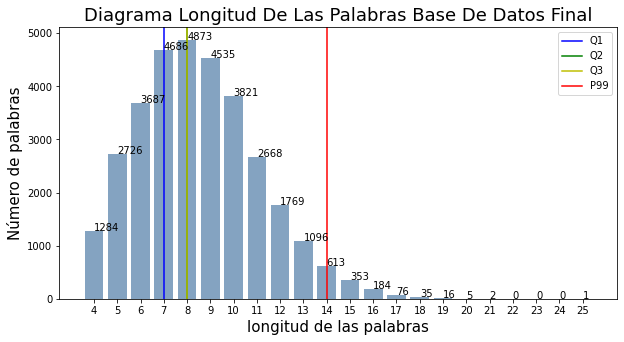

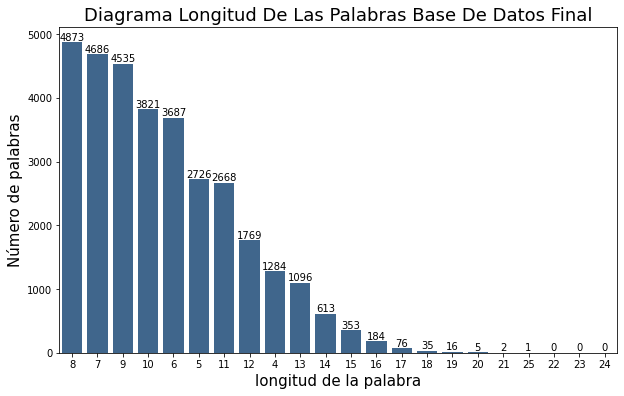

In [157]:
words_final_len=len_words(words_final_list,25)
print(words_final_len[1])
xaxis= [str(i) for i in range(26)]
stadistics = calculate_stadistics(words_final_len[2])
bars_diagram(xaxis[4:],words_final_len[0][4:],'Diagrama Longitud De Las Palabras Base De Datos Final',
             'longitud de las palabras','Número de palabras',stadistics,4)
##------
bars_graphs_descending(xaxis[4:],words_final_len[0][4:],'Diagrama Longitud De Las Palabras Base De Datos Final',
             'longitud de la palabra','Número de palabras')

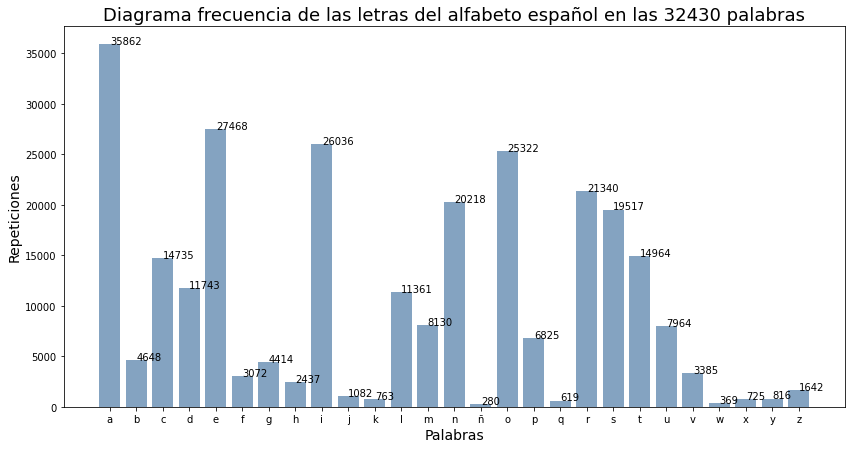

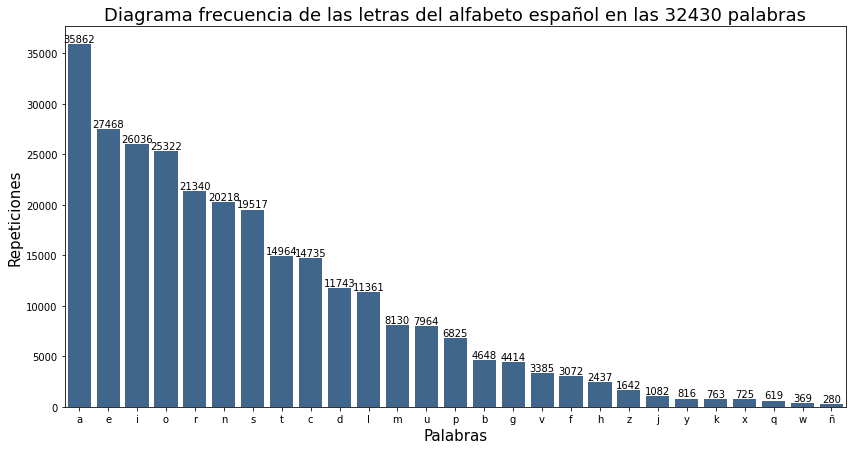

In [172]:
position_letters_dict = posittion_dict(alphabet,words_final_list)
letter_list = [i for i in position_letters_dict]
list_letter_repetitions=[]
for j in position_letters_dict:
    list_letter_repetitions.append(len(position_letters_dict[j]))
bars_diagram(letter_list,list_letter_repetitions,'Diagrama frecuencia de las letras del alfabeto español en las {} palabras'.format(len(words_final_list)),
             'Palabras','Repeticiones',None,0,14,7)
##----------------
bars_graphs_descending(letter_list,list_letter_repetitions,'Diagrama frecuencia de las letras del alfabeto español en las {} palabras'.format(len(words_final_list)),
             'Palabras','Repeticiones',14,7)

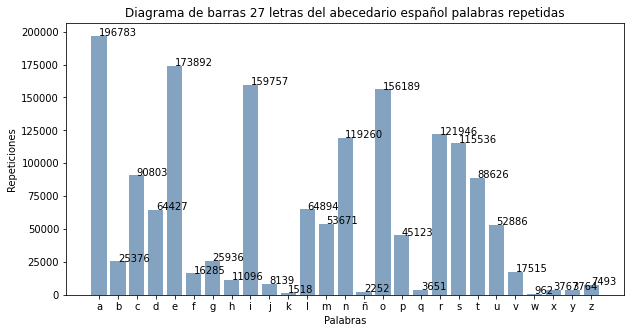

1631547


In [14]:
position_letters_dict = posittion_dict(alphabet,words_filter_list)
letter_list = [i for i in position_letters_dict]
list_letter_repetitions=[]
for j in position_letters_dict:
    list_letter_repetitions.append(len(position_letters_dict[j]))
bars_diagram(list_letter_repetitions,letter_list,'Diagrama de barras {} letras del abecedario español palabras repetidas'.format(len(alphabet)),
             'Palabras','Repeticiones')
print(sum(list_letter_repetitions))

# Letter Analysis

In [15]:
position_letters_dict = posittion_dict(alphabet,words_final_list)

In [16]:
letter_list = [i for i in position_letters_dict]
letters_repetitions=[]
for j in position_letters_dict:
    list_letter_repetitions.append(len(position_letters_dict[j]))

In [17]:
def list_dict_data(parameter,dictionary):
    b= (max(dictionary[parameter]))
    list_dict=(dictionary[parameter])
    position_sum=[0 for i in range(b+1)]
    for j in list_dict:
        position_sum[j] += 1
    del position_sum[0]
    Q1 = np.percentile(dictionary[parameter], 25)
    Q2 = np.percentile(dictionary[parameter], 50)
    Q3 = np.percentile(dictionary[parameter], 75)
    P99 = np.percentile(dictionary[parameter], 99)
    median = np.median(dictionary[parameter])
    mode = st.mode(dictionary[parameter])
    mean = np.mean(dictionary[parameter])
    variance = np.var(dictionary[parameter])
    desviation = np.std(dictionary[parameter])
    return [position_sum,Q1,Q2,Q3,median,mode,mean,P99,parameter,variance,desviation]

positions= list_dict_data('a',position_letters_dict)

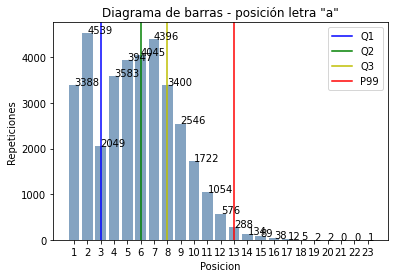

La mediana de la posición es: 6.0
La moda de la posición es: 2
La media de la posición es: 5.6265356265356266
La varianza de la posición es: 9.534413126550719
La desviación de la posición es: 3.0877845013133154


In [18]:
# create a dataset
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
height = positions[0]
bars = [i+1 for i in range(len(positions[0]))]
x_pos = np.arange(len(bars))
# Create bars
plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))

# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.axvline(positions[1]-1,color = 'b',label = 'Q1')
plt.axvline(positions[2]-1,color = 'g',label = 'Q2')
plt.axvline(positions[3]-1,color = 'y',label = 'Q3')
plt.axvline(positions[7]-1,color = 'r',label = 'P99')
# Show graph
plt.title('Diagrama de barras - posición letra "{}"'.format(positions[8]))
plt.xlabel('Posicion')
plt.ylabel('Repeticiones')
plt.legend()
addlabels( x_pos,height)
plt.show()

print('La mediana de la posición es: {}'.format(positions[4]))
print('La moda de la posición es: {}'.format(positions[5]))
print('La media de la posición es: {}'.format(positions[6]))
print('La varianza de la posición es: {}'.format(positions[9]))
print('La desviación de la posición es: {}'.format(positions[10]))

C:\Users\James Bedoya\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


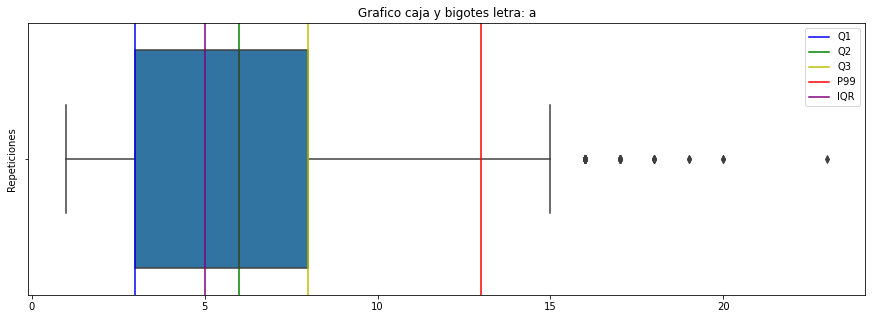

In [19]:
import seaborn as sns
plt.figure(figsize = (15,5))
plt.title('Grafico caja y bigotes letra: {}'.format(positions[8]))
sns.boxplot(position_letters_dict[positions[8]])
plt.axvline(positions[1],color = 'b',label = 'Q1')
plt.axvline(positions[2],color = 'g',label = 'Q2')
plt.axvline(positions[3],color = 'y',label = 'Q3')
plt.axvline(positions[7],color = 'r',label = 'P99')
plt.axvline((positions[3]-positions[1]),color = 'purple',label = 'IQR')
plt.ylabel('Repeticiones')
plt.legend()
plt.show()
print('')

# Pruebas de hipotesis

In [52]:
position_vowels_dict = posittion_dict(vowels,words_final_list)
position_consonants_dict = posittion_dict(consonants,words_final_list)

In [74]:
# crear la lista de veces a las que se repiten las posiciones para cada letra del diccionario
def repetitions_list(dictionary,limit=0):
    
    repetitions_list = []
    positions_list = []
    for letter in dictionary:
        for position in dictionary[letter]:
            positions_list.append(position)
            if position > limit and limit != 0:
                    for i in range((limit-len(repetitions_list))+1):
                        repetitions_list.append(0)
                    repetitions_list[limit] += 1
            else:
                if position >= len(repetitions_list):
                    for i in range((position-len(repetitions_list))+1):
                        repetitions_list.append(0)
                repetitions_list[position] += 1
            
    del repetitions_list[0]    
    return [repetitions_list,positions_list]

In [34]:

def graphic_qqplot(numbers):
    # ==============================================================================
    df_words_frecuency = pd.DataFrame(list(zip(numbers)),
                   columns =['frecuency'])

    peso = df_words_frecuency['frecuency']
    fig, ax = plt.subplots(figsize=(7,4))
    sm.qqplot(
        peso,
        fit   = True,
        line  = 'q',
        alpha = 0.4,
        lw    = 2,
        ax    = ax
    )
    ax.set_title('', fontsize = 16,
                 fontweight = "bold")
    ax.tick_params(labelsize = 7)
    # Test de D'Agostino
    stat, p = normaltest(peso)
    print('Estadisticos=%.3f, p=%.3f' % (stat, p))
    # Interpretación
    alpha = 0.05
    if p > alpha:
       return print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
    else:
       return print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')


Estadisticos=6035.444, p=0.000
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
25


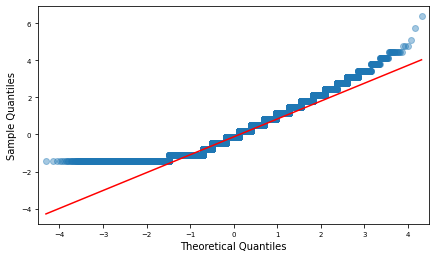

In [83]:
vowels_repetitions = repetitions_list(position_vowels_dict)
graphic_vowels = graphic_qqplot(vowels_repetitions[1])
print(max(vowels_repetitions[1]))

Estadisticos=10550.280, p=0.000
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
24


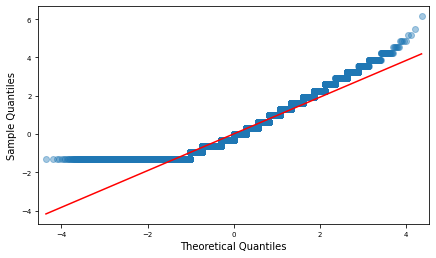

In [82]:
consonants_repetitions = repetitions_list(position_consonants_dict)
graphic_consonants = graphic_qqplot(consonants_repetitions[1])
print(max(consonants_repetitions[1]))

In [84]:
print(len(consonants_repetitions[1]))
print((len(vowels_repetitions[1])))
print(((len(vowels_repetitions[1]))-len(consonants_repetitions[1])))
print(consonants_repetitions[0])
print(vowels_repetitions[0])

152611
122379
-30232
[23717, 11587, 23789, 17298, 16520, 15772, 12120, 10492, 7542, 5412, 3553, 2183, 1235, 741, 360, 157, 84, 33, 7, 5, 2, 1, 0, 1]
[8578, 20708, 8506, 14997, 14542, 12603, 12585, 9532, 7620, 5222, 3261, 1965, 1144, 543, 311, 162, 51, 26, 17, 3, 1, 0, 1, 0, 1]


In [87]:
stats.ks_2samp(vowels_repetitions[1],consonants_repetitions[1])

KstestResult(statistic=0.08531446946044133, pvalue=0.0)